In [ ]:
pip install tensorflow

In [11]:
from tensorflow import keras


In [12]:
#Pretrained model on ImageNet
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)



In [18]:
# Freeze base model
base_model.trainable = False


In [19]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)


# Add final dense layer
outputs = keras.layers.Dense(14, activation = 'softmax')(x)


# Combine inputs and outputs to create model
model = keras.Model(inputs,outputs)


In [20]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_4  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 14)                7182      
                                                                 
Total params: 14721870 (56.16 MB)
Trainable params: 7182 (28.05 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [21]:
# compile the model with loss and metrics options
model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [22]:
#Augment the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True) # randomnly flip images

In [23]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('images/train', 
                                       target_size=(224,224), 
                                       color_mode='rgb', 
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('images/test', 
                                      target_size=(224,224), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 3641 images belonging to 14 classes.
Found 616 images belonging to 14 classes.


Epoch 1/30


2023-05-12 10:50:16.067734: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 73/113 [==================>...........] - ETA: 2:13 - loss: 4.5382 - accuracy: 0.2907

/Users/spartan/anaconda3/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


114/113 [==============================] - ETA: 0s - loss: 3.6787 - accuracy: 0.3826

2023-05-12 10:56:38.383834: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


113/113 [==============================] - 451s 4s/step - loss: 3.6787 - accuracy: 0.3826 - val_loss: 1.7087 - val_accuracy: 0.5974
Epoch 2/30
113/113 [==============================] - 473s 4s/step - loss: 1.3821 - accuracy: 0.6877 - val_loss: 1.1352 - val_accuracy: 0.7403
Epoch 3/30
113/113 [==============================] - 478s 4s/step - loss: 0.9819 - accuracy: 0.7564 - val_loss: 0.8490 - val_accuracy: 0.7679
Epoch 4/30
113/113 [==============================] - 485s 4s/step - loss: 0.8012 - accuracy: 0.8001 - val_loss: 0.8057 - val_accuracy: 0.8084
Epoch 5/30
113/113 [==============================] - 522s 5s/step - loss: 0.6275 - accuracy: 0.8336 - val_loss: 0.7472 - val_accuracy: 0.8231
Epoch 6/30
113/113 [==============================] - 547s 5s/step - loss: 0.5279 - accuracy: 0.8550 - val_loss: 0.6019 - val_accuracy: 0.8328
Epoch 7/30
113/113 [==============================] - 546s 5s/step - loss: 0.5070 - accuracy: 0.8599 - val_loss: 0.5848 - val_accuracy: 0.8555
Epoch 8/30

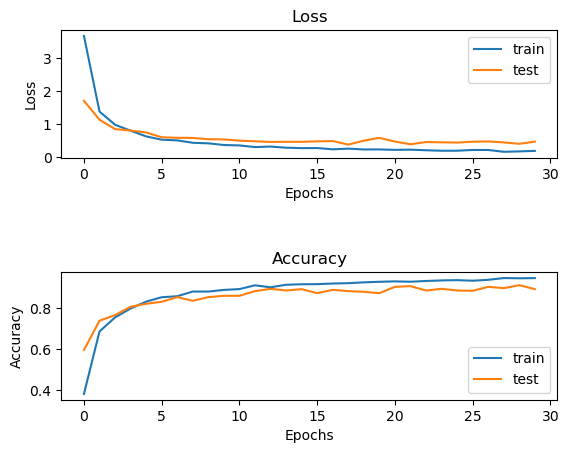

In [24]:
history = model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples/32,
          validation_steps=valid_it.samples/32,
          epochs=30)

import matplotlib.pyplot as pyplot
%matplotlib inline

pyplot.subplots_adjust(hspace=0.9)

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')

pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

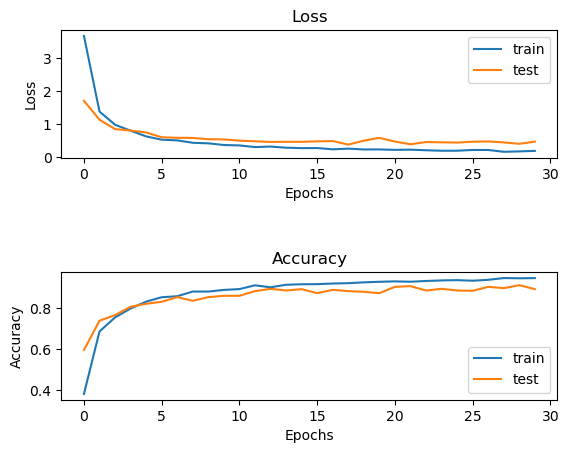

In [25]:
import matplotlib.pyplot as pyplot
%matplotlib inline

pyplot.subplots_adjust(hspace=0.9)

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')

pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()